In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

In [8]:
def CreateMasterSpiralDF(dirName="."):
    """CreateMasterSpiralDF(dirName) where dirName is the directory name of the .spiral files,
       output pandas dataframe of all spiral files header data and filenames"""
    assert isinstance(dirName, str), "The 'dirName' argument must be a string!"
    fileNames = [dirName+'/'+i for i in listdir(dirName) if i[-7:] == '.spiral']
    
    if len(fileNames)==0:
        print "No '.spiral' files found in directory '"+dirName+"'."
        return
    
    D = {"file_name" : []}
    for index,name in enumerate(fileNames):
        f = open(name,'r')
        for i in xrange(2): colNames = f.readline().split()
        if index == 0:
            for colName in colNames:
                D[colName] = []
        D["file_name"].append(name)
        simParams = f.readline().split()
        for colIndex,colName in enumerate(colNames):
            D[colName].append(float(simParams[colIndex]))
        f.close()
    df = pd.DataFrame(D)
    return df

def CreateSpiralDF(fileName):
    """CreateSpiralDF(fileName) where fileName is the name of a '.spiral' analysis file,
       outputs pandas dataframe of time series data"""
    assert isinstance(fileName,str), "The 'fileName' argument must be a string!"
    try:
        f = open(fileName,'r')
    except:
        print "Could not open file '" + fileName + "'."
        return
    for i in xrange(4): colNames = f.readline().split()
    D = {}
    for colName in colNames:
        D[colName] = []
    for line in f:
        line = line.split()
        for colIndex, colName in enumerate(colNames):
            D[colName].append(float(line[colIndex]))
    f.close()
    df = pd.DataFrame(D)
    return df

In [4]:
masterDF = CreateMasterSpiralDF('nostoch')
#singleDF = CreateSpiralDF(masterDF.iloc[0]['file_name'])
#plt.figure()
#singleDF.plot(x='time',y='tip_z_proj')
#plt.show()
#plt.close()


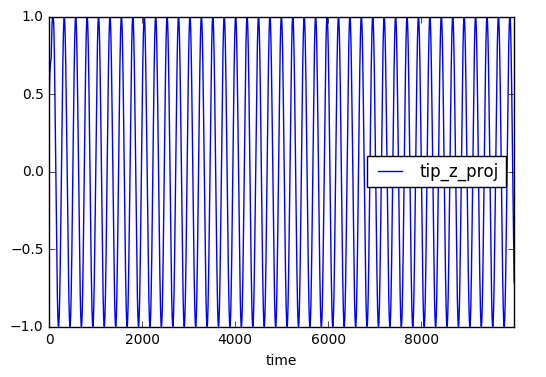

50.0


In [11]:
df = CreateSpiralDF(masterDF.iloc[100]["file_name"])
plt.figure()
df.plot(x="time",y="tip_z_proj")
plt.show()
print masterDF.iloc[100]["driving"]

In [ ]:
var_range = range()
f = open("")
f.close()

# set up index 'pointers' for persistence length and driving

lpIndex={}
drIndex={}
index=0
for i in range(50,1001,50):
    lpIndex[i]=index
    index+=1
index=0
for i in range(0,101,5):
    drIndex[i]=index
    index+=1
    
array = [[1 for i in range(max(drIndex.values())+1)] for j in range(max(lpIndex.values())+1)]

length = 50
for var in range(0,900):
    fname = "spiral_nostoch_l"+'{:03d}'.format(length)+"_v"+'{:03d}'.format(var)+"_filament.spiral"
    f=open(fname,'r')
    f.readline()
    f.readline()
    line = f.readline()
    line=line.split(' ')
    childLength = float(line[1])
    persistenceLength = int(line[2])
    driving = int(line[3])
    if (childLength > 4):
        f.close()
        continue
    angle=[]
    time=[]
    f.readline()
    for line in f:
        line=line.split(' ')
        if (float(line[1]) < np.pi):
            array[lpIndex[persistenceLength]][drIndex[driving]] = 0
            break
for var in range(0,420):
    fname = "spiral_nostoch_l"+'{:03d}'.format(length)+"_v"+'{:03d}'.format(var)+"_filament.spiral"
    f=open(fname,'r')
    f.readline()
    f.readline()
    line = f.readline()
    line=line.split(' ')
    childLength = float(line[1])
    persistenceLength = int(line[2])
    driving = int(line[3])
    angle=[]
    time=[]
    f.readline()
    for line in f:
        line=line.split(' ')
        if (float(line[1]) < np.pi):
            array[lpIndex[persistenceLength]][drIndex[driving]] = 0
            break